In [1]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.animation as animation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib notebook

In [2]:
directory = '../data/'
ps4 = pd.read_csv(directory +'PS4_GamesSales.csv',encoding = 'windows-1252')
xbox  = pd.read_csv(directory +'XboxOne_GameSales.csv',encoding = 'windows-1252')
sales = pd.read_csv(directory +'Video_Games_Sales_as_at_22_Dec_2016.csv',encoding = 'windows-1252')

In [3]:
appended = ps4.append(xbox, ignore_index = True)

In [4]:
def formating(df,col0, col1 = 'Year'):
    df1 = df.groupby([col0])[col1].apply(Counter).to_frame().fillna(0)
    formated = df1.reset_index(level = [0,1]).groupby(['level_1'])[col1].apply(np.array).to_frame()
    return formated,df1

<IPython.core.display.Javascript object>


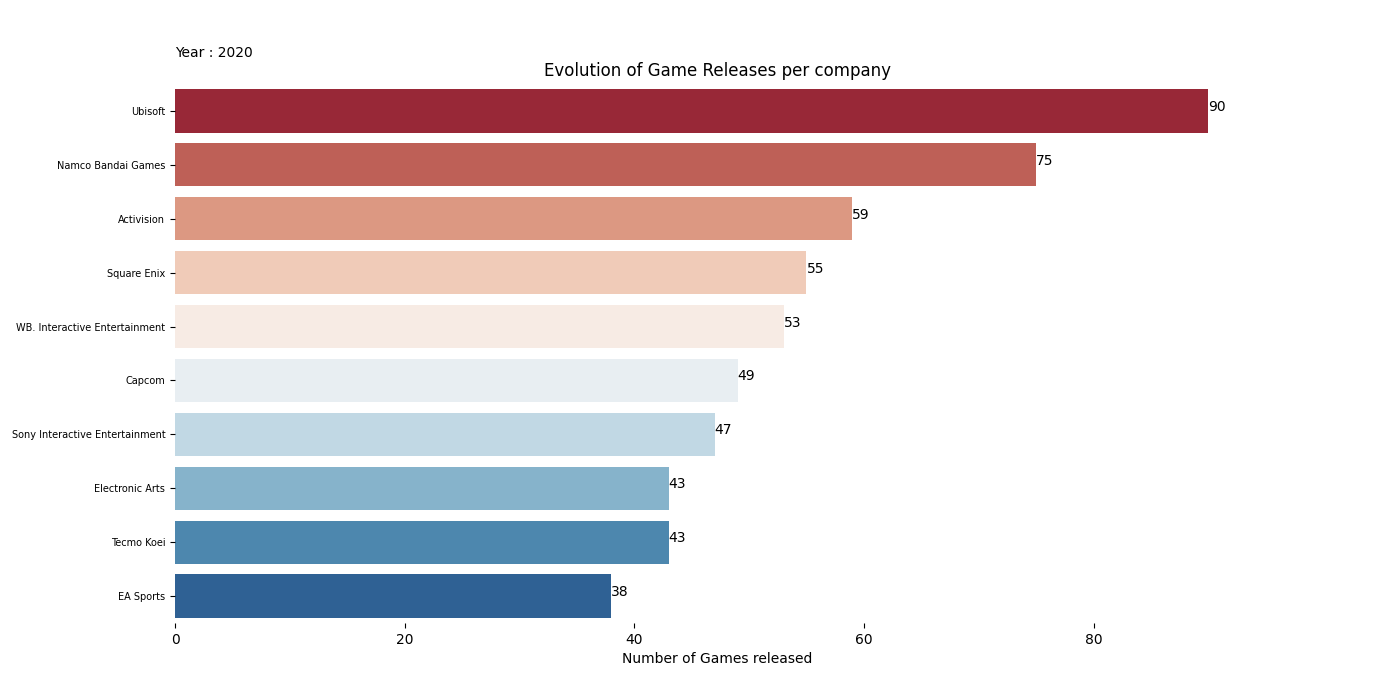

In [5]:
fig = plt.figure(figsize = (14,7))
ax = plt.subplot(1,1,1)

top = 10
def Plotting(i ):
    idxs = list(np.unique(df.index))
    if i == len(idxs) -1:
        a.event_source.stop()
    plt.cla()
    idx = idxs[i]
    yticks = np.unique(df1.reset_index(level=1).index.astype(str))
    yticks = [i.replace('Warner Bros', 'WB') for i in yticks]
    init = 0
    for i in df['Year'].loc[:idx]:
        if idx == 2013:
            init = i
        else:
            init+=i
    dico = dict( zip(yticks , init) )
    dico = { k :v for k,v in sorted(dico.items(), key = lambda item : item[1], reverse = True) }
    pub = np.array(list(dico.keys())[:top])
    val = np.array(list(dico.values())[:top])
    
    bars = sns.barplot( val, pub, orient = 'h' , palette = 'RdBu')
    ax.set_xlabel(xlabel)
    ax.tick_params(axis = 'y', labelsize = 7)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.set_title(title)
    return bars,val,idx
def animate(i, top = top):
    
    bars, val,idx = Plotting(i)
    for count,i  in enumerate(val):
        bars.text( i  ,count,int(i))
    ax.text(0,-1,f'Year : {int(idx)} ')

# necessary arguments :
xlabel = 'Number of Games released'
title = 'Evolution of Game Releases per company'
df,df1 = formating(appended,'Publisher')

# 
a = animation.FuncAnimation(fig, animate, interval=500, frames = 500)
# NB : We a game twice if it was released on both the PS4 and Xbox

<IPython.core.display.Javascript object>


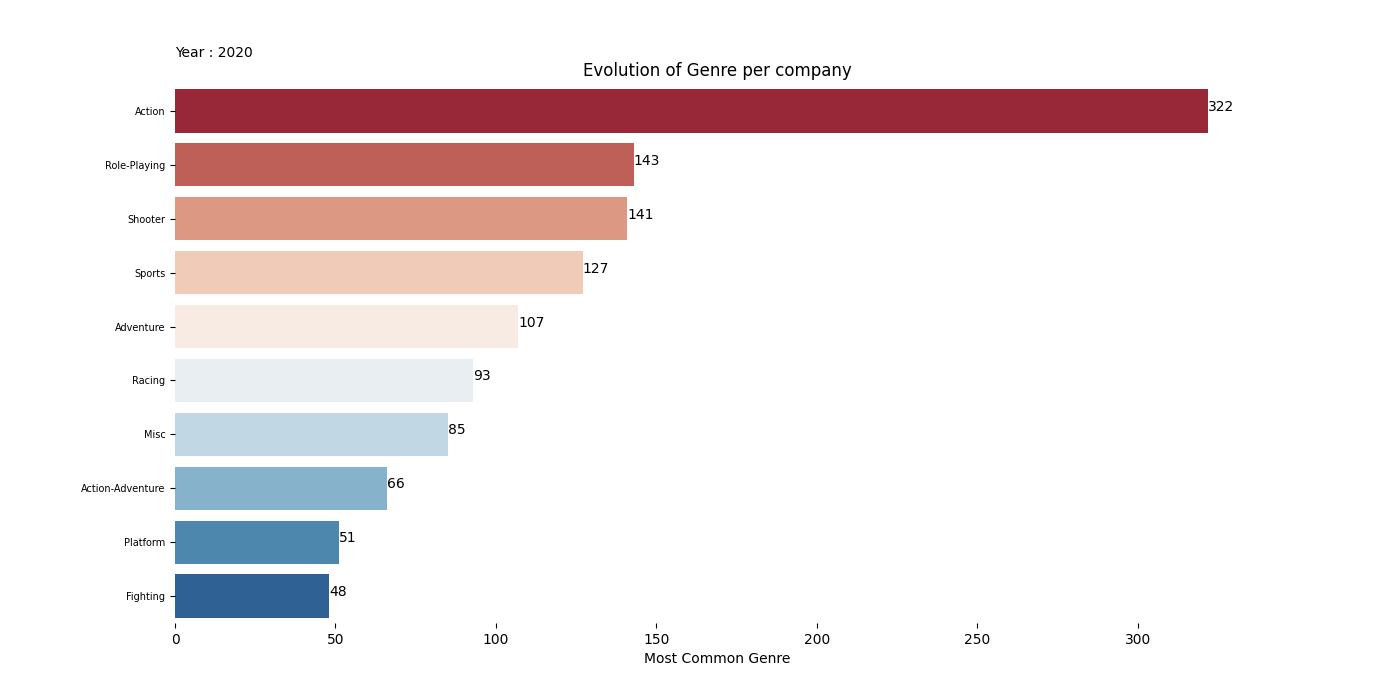

In [6]:
fig1 = plt.figure(figsize = (14,7))
ax = plt.subplot(1,1,1)
# necessary arguments
xlabel = 'Most Common Genre'
title = 'Evolution of Genre per company'
df , df1 = formating(appended,'Genre')
# 
a = animation.FuncAnimation(fig1, animate, interval=500, frames = 500)

In [7]:
formated,df0 = formating(sales,'Year_of_Release','Genre')

<IPython.core.display.Javascript object>


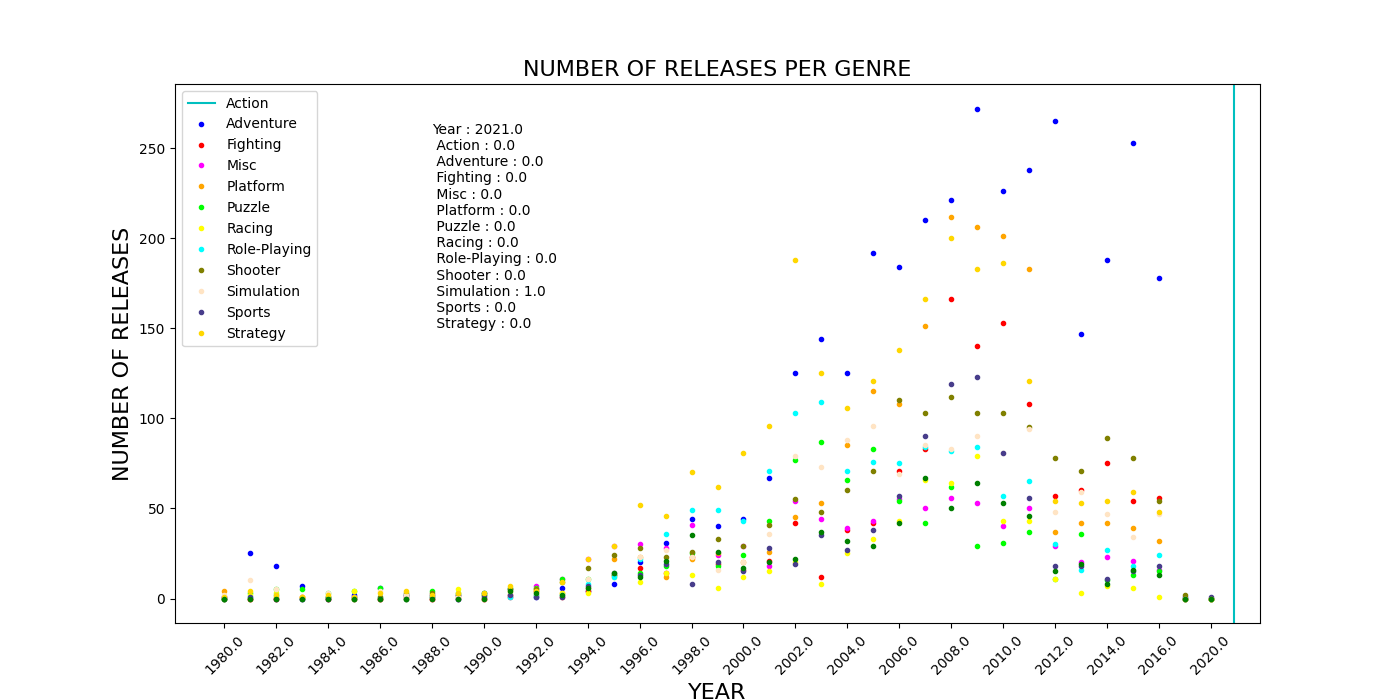

In [8]:
class Cursor:
    def __init__(self,ax):
        self.ax = ax
        self.ly = ax.axvline(color = 'c')
        self.text = ax.text(8,150,'')
    def mov(self,event):
        if not event.inaxes:
            return
        x = event.xdata
        self.ly.set_xdata(x)
        matrix_val = np.array(list(formated['Genre'])) 
        dico = dict( zip(list(formated.index), matrix_val[:,int(x)]) )
        values = ' \n '.join(  [ f'{k} : {v}' for k,v in dico.items()] ) 
        if int(x) > 37:
            self.text.set_text(f'Year : {1980 + round(x)+2} \n {values}')
        else:
            self.text.set_text(f'Year : {1980 + round(x)} \n {values}')
    def onpick(self,event):
        x , y= event.xdata , event.ydata
        if int(x) > 37:
            year = 1980 + round(x)+2
        else:
            year = 1980 + round(x)
        argm = np.argmax( abs(df0.loc[year].values.reshape(-1) - y) <= 4)
        gen = df0.loc[year].index[argm]
        if not np.sum(abs(df0.loc[year].values.reshape(-1) - y) <= 4) == 0:
            plt.gca().cla()
            plt.gca().set_title(f' Type : {gen}')
            sc = plot_gen(masked = True, mask = gen)


        
    
fig = plt.figure(figsize = (14,7))
ax = plt.subplot(1,1,1)
step = 2
def plot_gen(masked = False, mask = None):
    xticks = np.unique(df0.reset_index(level=1).index.astype(str))
    ax.xaxis.set_ticks( np.arange(0, len(xticks) , step)  ) 
    ax.set_xticklabels( xticks[::step], rotation = 45)
    if masked:
        sc = ax.plot(formated.loc[mask].values[0],c = colors[mask], marker = 'o',markersize = 3,lw= 0)
        ax.legend([mask])
    else:
        for idx in formated.index:
            sc = ax.plot(formated.loc[idx]['Genre'],c = colors[idx], marker = 'o',markersize = 3,lw= 0)
            ax.legend(formated.index)
    ax.set_xlabel('YEAR', size = 16)
    ax.set_ylabel('NUMBER OF RELEASES', size = 16);
    ax.set_title('NUMBER OF RELEASES PER GENRE', size = 16)
    plt.connect('motion_notify_event',cursor.mov)
    plt.connect('button_press_event', cursor.onpick)
    return sc
    
cursor = Cursor(ax)
gen = list(formated.index)
colorie = ['blue','red','magenta','orange','lime','yellow','cyan', 'olive','bisque','darkslateblue','gold','green']
colors = dict(zip(gen,colorie))
sc = plot_gen(mask = False);


# you can click on a scatter point to select the whole Genre